In [1]:
import pandas as pd

# dataset
file_path = "D:\Excelr\Data Science\Data Science Assignment\Clustering\Clustering\EastWestAirlines.csv"
data = pd.read_csv(file_path)

data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [2]:
# missing values
missing_values = data.isnull().sum()
# Summary statistics
summary_stats = data.describe()

missing_values, summary_stats

(ID#                  0
 Balance              0
 Qual_miles           0
 cc1_miles            0
 cc2_miles            0
 cc3_miles            0
 Bonus_miles          0
 Bonus_trans          0
 Flight_miles_12mo    0
 Flight_trans_12      0
 Days_since_enroll    0
 Award?               0
 dtype: int64,
                ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
 count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
 mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
 std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
 min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
 25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
 50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
 75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
 max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   
 
  

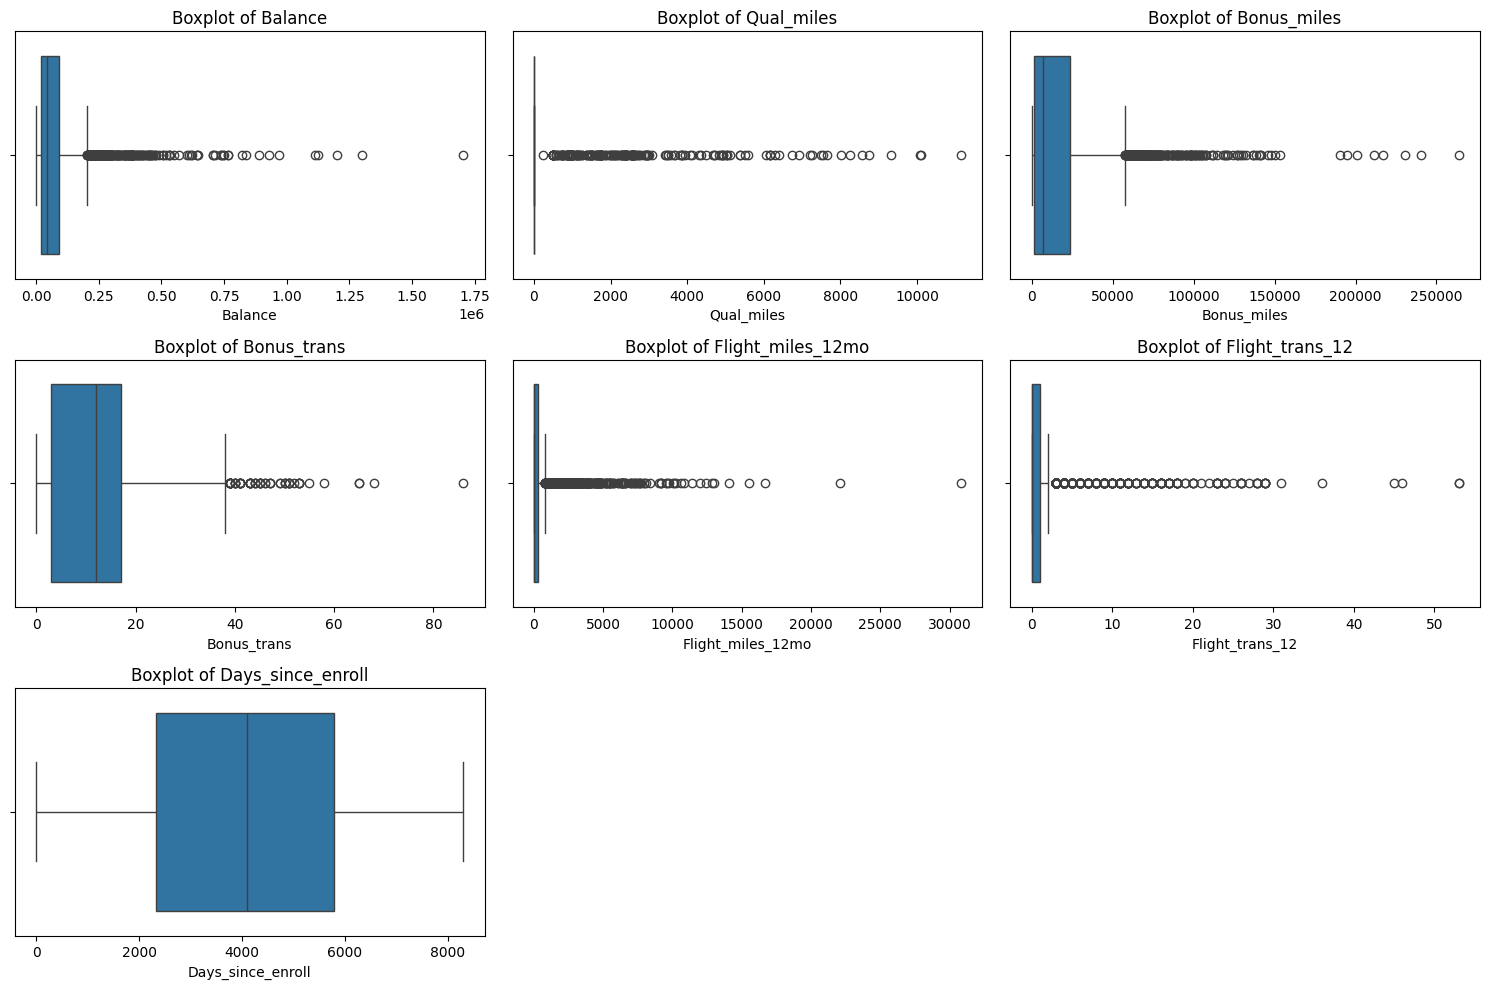

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# multiple boxplots to detect outliers
plt.figure(figsize=(15, 10))

# Select key numerical features for outlier detection
numerical_features = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 
                      'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

# boxplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
# Scale the numerical features
scaler = StandardScaler()
scaled_data = data.copy()  # Copy original data
scaled_data[numerical_features] = scaler.fit_transform(data[numerical_features])

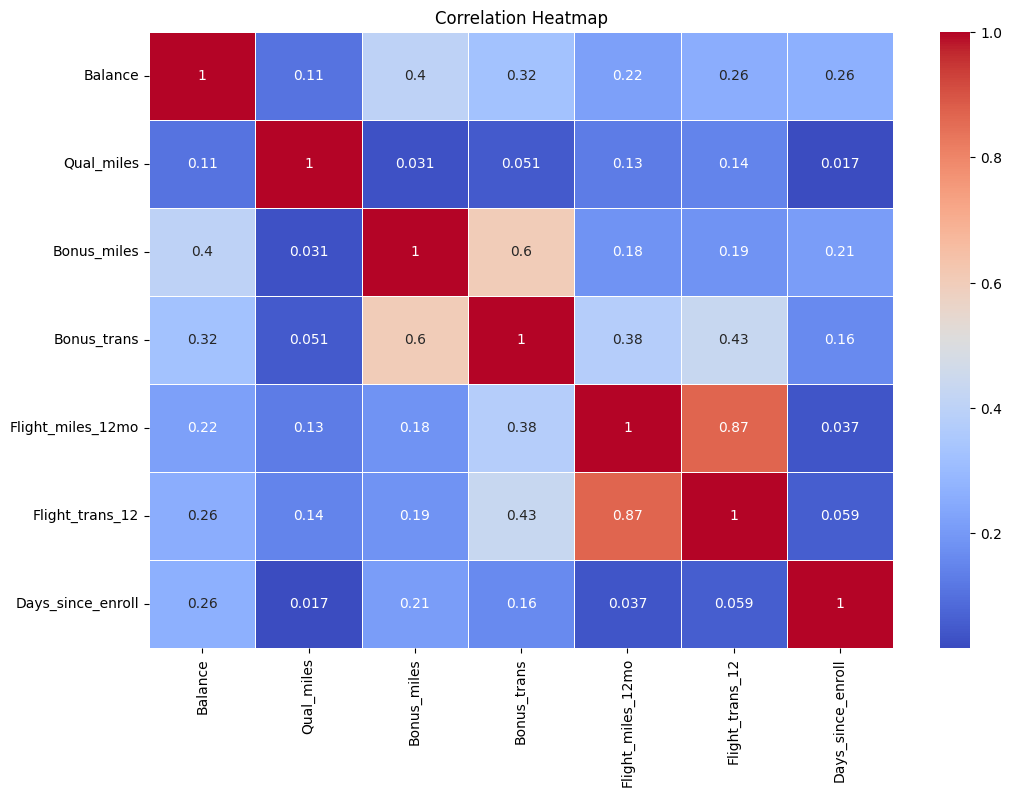

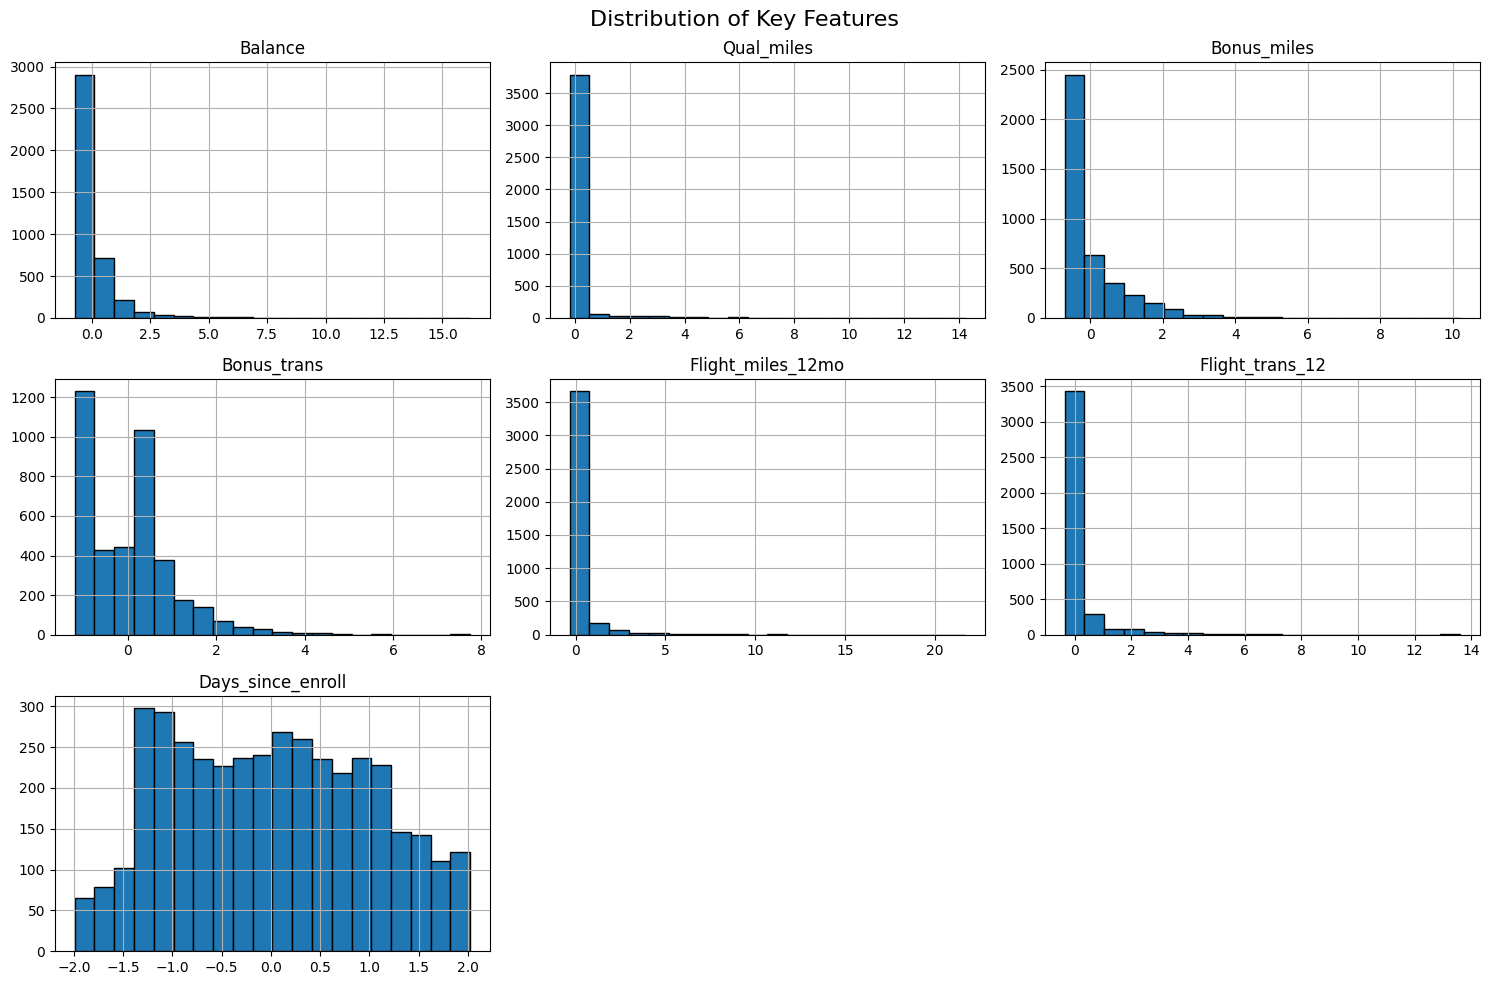

In [5]:
# correlation heatmap to visualize the relationships between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = scaled_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# Histograms to visualize distributions of key numerical features
scaled_data[numerical_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Key Features', fontsize=16)
plt.tight_layout()
plt.show()

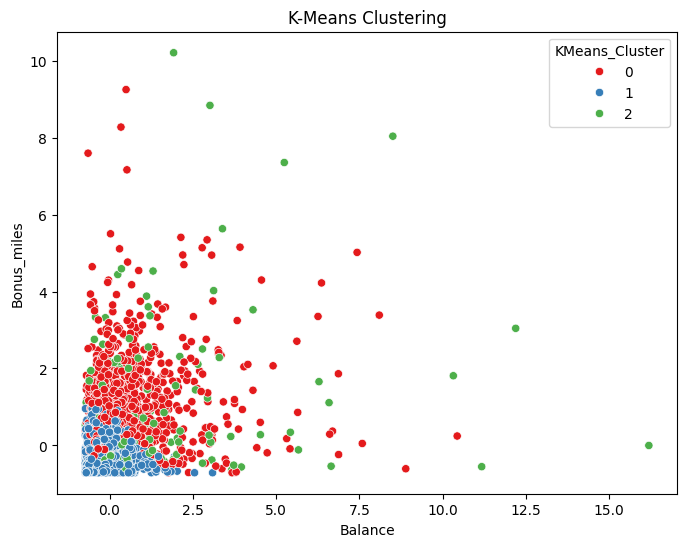

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Select the numerical features
numerical_features = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
# Standardize the numerical features
scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[numerical_features] = scaler.fit_transform(scaled_data[numerical_features])
# K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
scaled_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data[numerical_features])
# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data['Balance'], y=scaled_data['Bonus_miles'], hue=scaled_data['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.show()

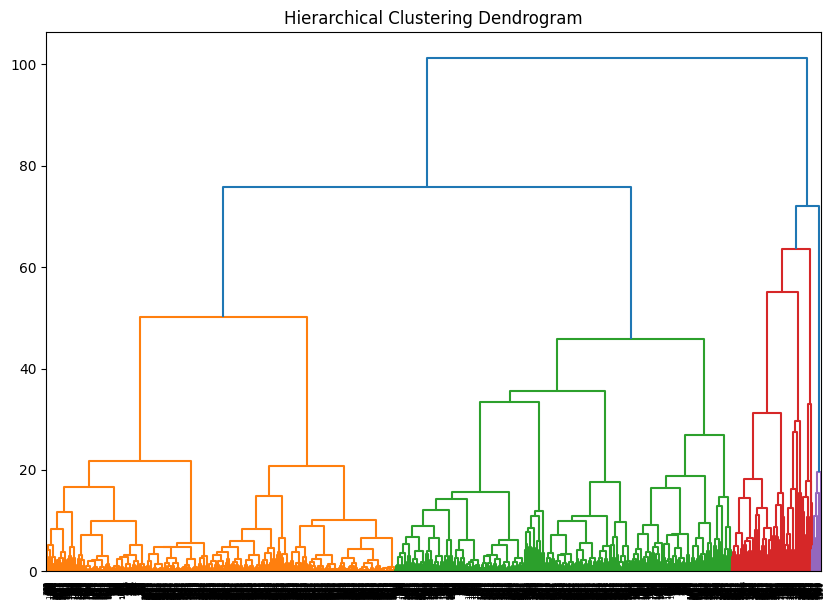

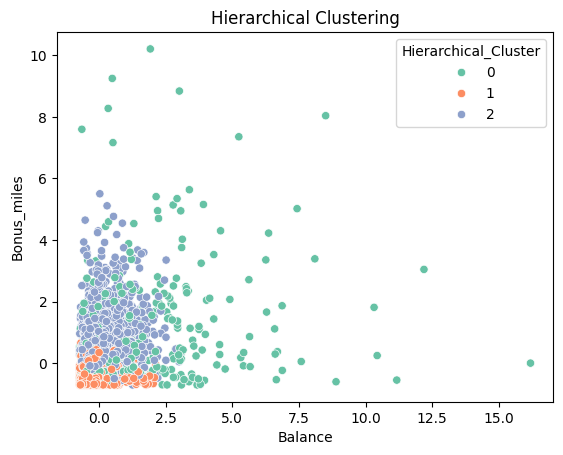

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
linked = linkage(scaled_data[numerical_features], method='ward')
# Dendrogram plot
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
scaled_data['Hierarchical_Cluster'] = agg_clustering.fit_predict(scaled_data[numerical_features])
# Visualize clusters
sns.scatterplot(x=scaled_data['Balance'], y=scaled_data['Bonus_miles'], hue=scaled_data['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.show()

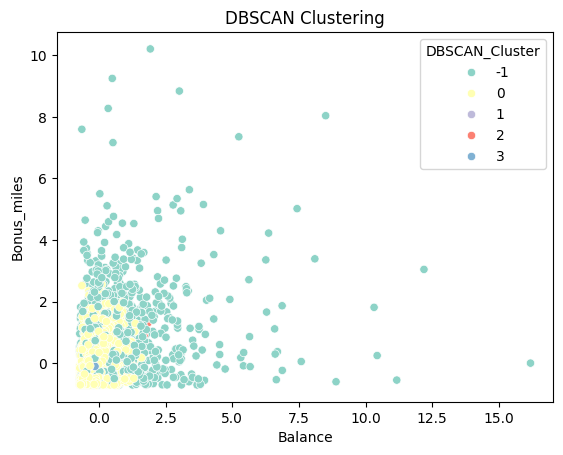

In [8]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
scaled_data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data[numerical_features])
# Visualize DBSCAN clusters
sns.scatterplot(x=scaled_data['Balance'], y=scaled_data['Bonus_miles'], hue=scaled_data['DBSCAN_Cluster'], palette='Set3')
plt.title('DBSCAN Clustering')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.show()

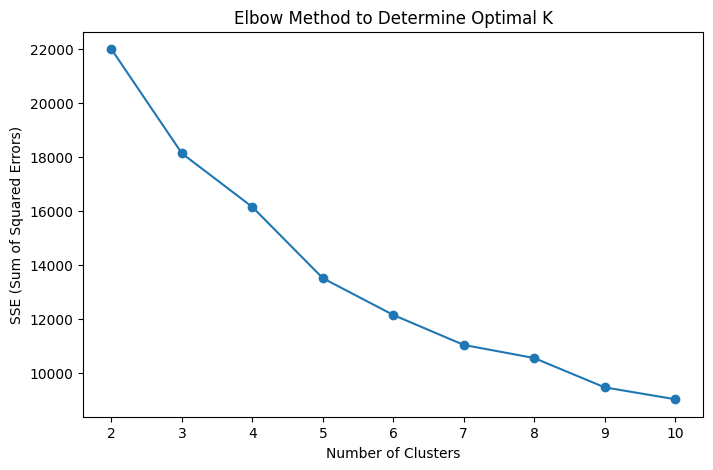

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# range of cluster numbers to evaluate
sse = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data[numerical_features])
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

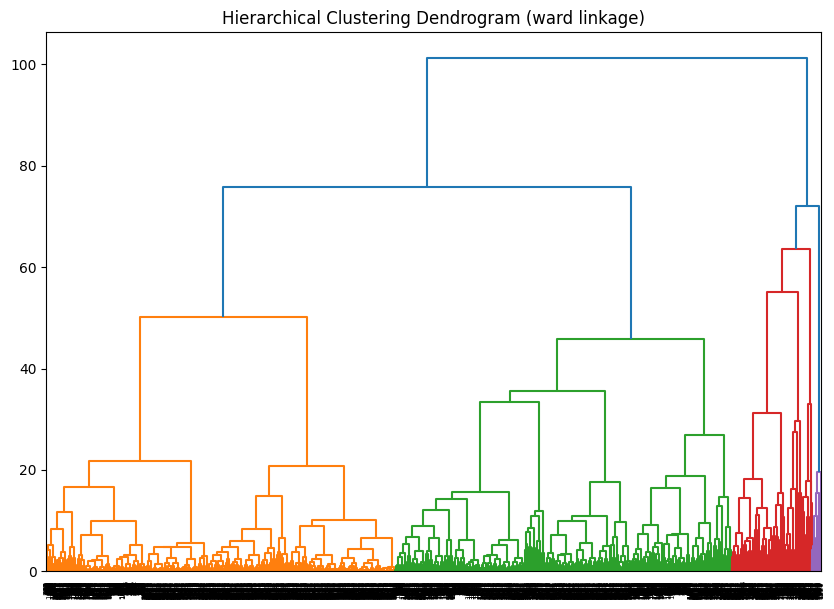

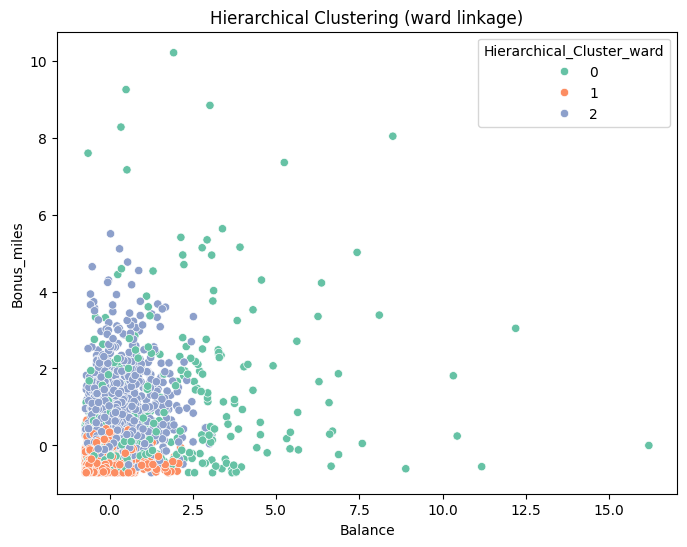

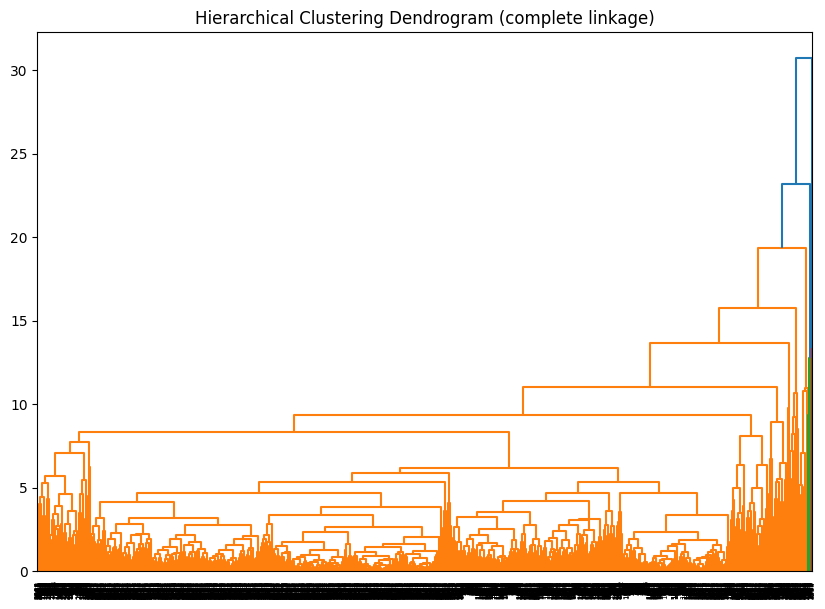

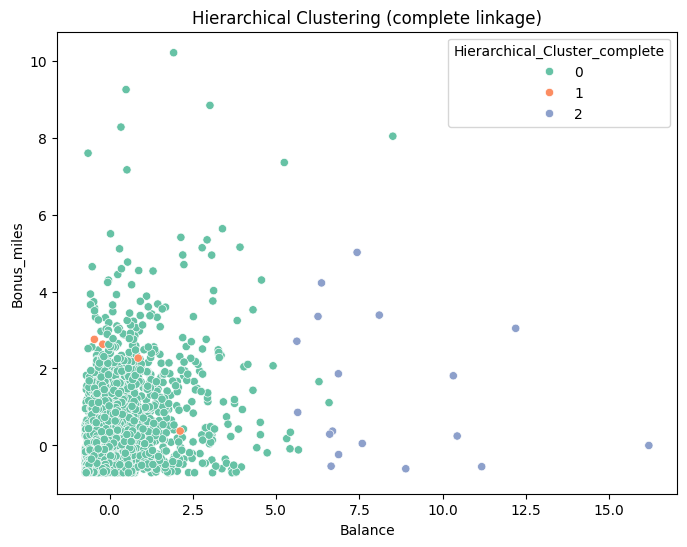

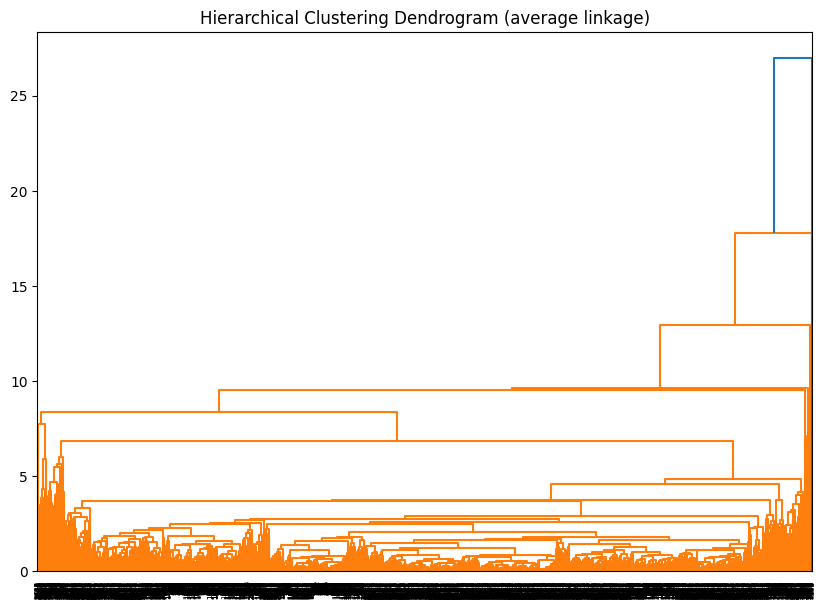

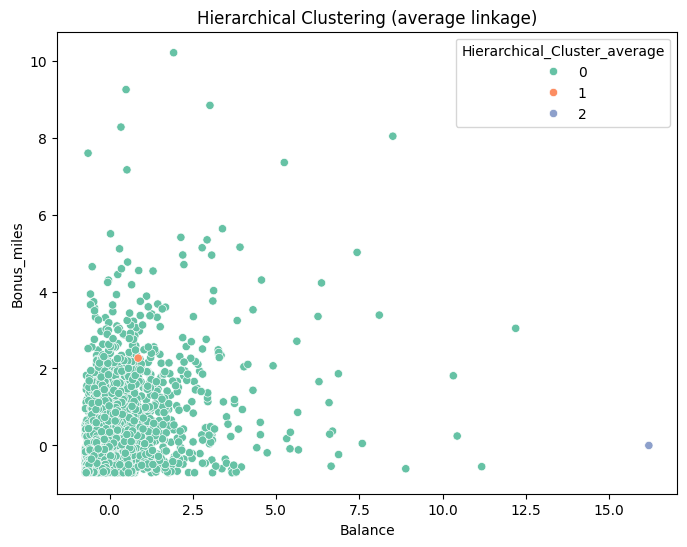

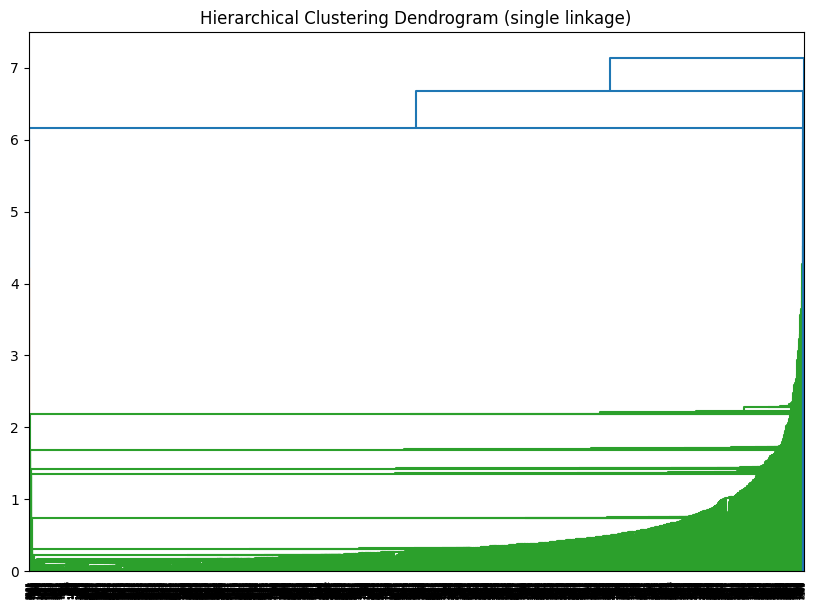

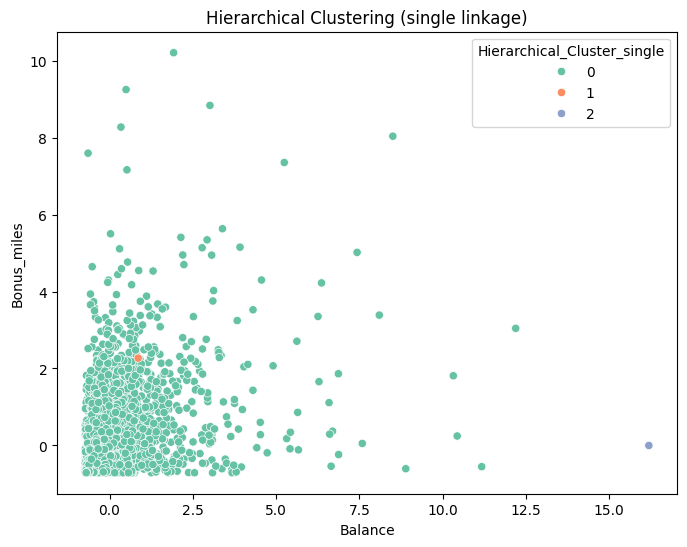

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    # Perform hierarchical clustering with different linkage criteria
    linked = linkage(scaled_data[numerical_features], method=method)

    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.show()

    # Apply Agglomerative Clustering with 3 clusters for each linkage method
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    scaled_data[f'Hierarchical_Cluster_{method}'] = agg_clustering.fit_predict(scaled_data[numerical_features])

    # Visualize clusters for each linkage method
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=scaled_data['Balance'], y=scaled_data['Bonus_miles'], hue=scaled_data[f'Hierarchical_Cluster_{method}'], palette='Set2')
    plt.title(f'Hierarchical Clustering ({method} linkage)')
    plt.xlabel('Balance')
    plt.ylabel('Bonus_miles')
    plt.show()

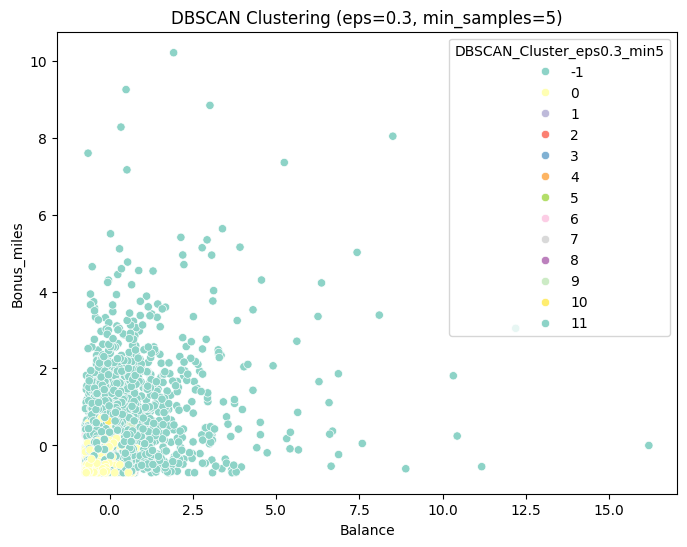

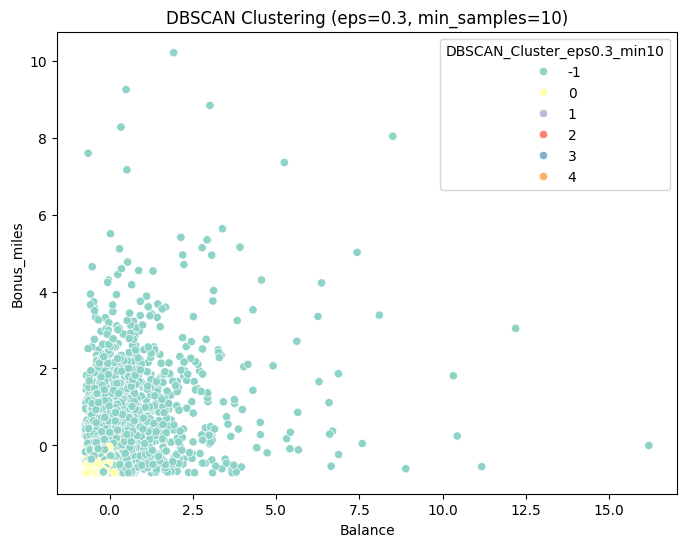

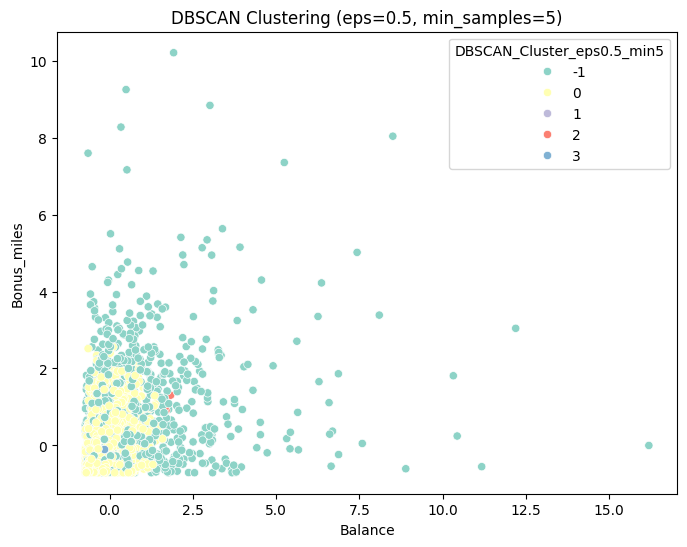

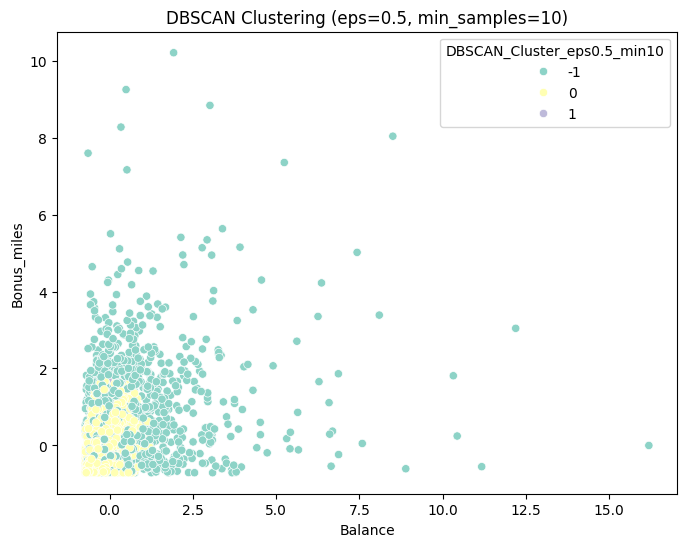

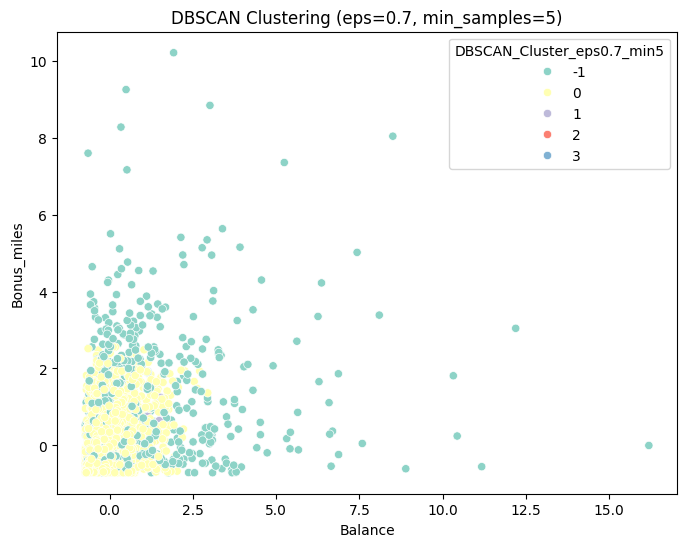

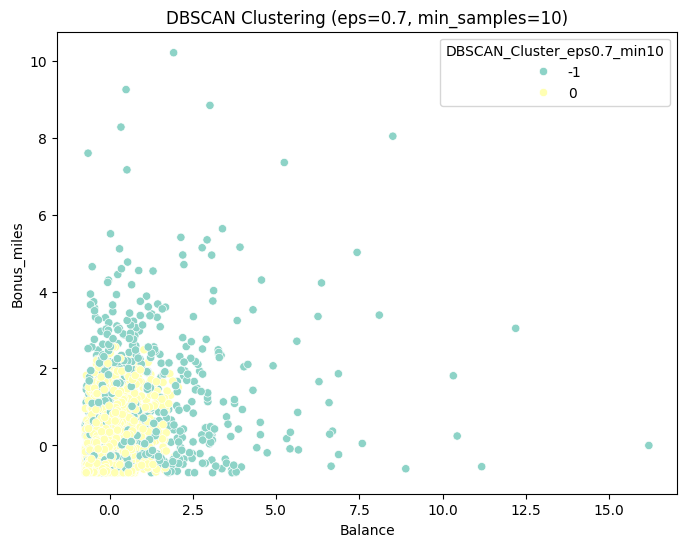

In [11]:
from sklearn.cluster import DBSCAN

# different eps and min_samples values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        scaled_data[f'DBSCAN_Cluster_eps{eps}_min{min_samples}'] = dbscan.fit_predict(scaled_data[numerical_features])

        # Visualize DBSCAN clusters
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=scaled_data['Balance'], y=scaled_data['Bonus_miles'], hue=scaled_data[f'DBSCAN_Cluster_eps{eps}_min{min_samples}'], palette='Set3')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Balance')
        plt.ylabel('Bonus_miles')
        plt.show()

In [12]:
# cluster centers (centroids) for K-Means
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans_centroids), columns=numerical_features)
# cluster centroids
print("K-Means Cluster Centroids:\n", kmeans_centroids_df)
# Summarize data by cluster for K-Means
kmeans_summary = scaled_data.groupby('KMeans_Cluster')[numerical_features].mean()
print("K-Means Cluster Summary:\n", kmeans_summary)

K-Means Cluster Centroids:
          Balance   Qual_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0  269865.895833    84.776042  27499.380208    13.880208         421.510417   
1   58936.900238    45.534442  20054.176960    17.137767         147.060570   
2  804847.965517   437.310345  60548.862069    22.931034        1597.448276   
3  114012.175439  5543.333333  19196.684211    12.298246         939.771930   
4  167563.833333   116.881944  92863.770833    27.458333         758.166667   
5  162423.410256   696.512821  41798.051282    38.128205        9897.820513   
6   81156.865320    38.042088  31919.279461    17.462963         206.500000   
7   30020.517098    36.796891   2398.381347     3.321244         127.188601   
8   38523.832109    54.821616   3629.377754     5.292760         170.713536   
9  101627.217391   210.320652  20710.978261    21.043478        3433.891304   

   Flight_trans_12  Days_since_enroll  
0         1.177083        5546.052083  
1         0.446556    

In [31]:
# Summarize data by cluster for hierarchical clustering
for method in linkage_methods:
    print(f"Hierarchical Clustering ({method} linkage) Summary:")
    hierarchical_summary = scaled_data.groupby(f'Hierarchical_Cluster_{method}')[numerical_features].mean()
    print(hierarchical_summary)

Hierarchical Clustering (ward linkage) Summary:
                            Balance  Qual_miles  Bonus_miles  Bonus_trans  \
Hierarchical_Cluster_ward                                                   
0                          1.169491    0.822822     0.686511     0.940074   
1                         -0.359738   -0.185158    -0.558761    -0.765976   
2                          0.062609   -0.026397     0.397148     0.544703   

                           Flight_miles_12mo  Flight_trans_12  \
Hierarchical_Cluster_ward                                       
0                                   1.738122         1.834083   
1                                  -0.230398        -0.243146   
2                                  -0.222411        -0.234662   

                           Days_since_enroll  
Hierarchical_Cluster_ward                     
0                                   0.242777  
1                                  -0.346553  
2                                   0.294889  
Hiera

In [32]:
# Summarize data by cluster for DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples}) Summary:")
        dbscan_summary = scaled_data.groupby(f'DBSCAN_Cluster_eps{eps}_min{min_samples}')[numerical_features].mean()
        print(dbscan_summary)

DBSCAN Clustering (eps=0.3, min_samples=5) Summary:
                             Balance  Qual_miles  Bonus_miles  Bonus_trans  \
DBSCAN_Cluster_eps0.3_min5                                                   
-1                          0.424389    0.197726     0.486728     0.503263   
 0                         -0.412200   -0.186299    -0.471092    -0.486558   
 1                          0.460485   -0.186299     0.316365     0.353873   
 2                          0.614341   -0.186299     0.644657     0.395528   
 3                         -0.113656   -0.186299    -0.579201    -0.843719   
 4                          0.314424   -0.186299     0.722884     0.284447   
 5                         -0.268900   -0.186299    -0.036964     0.366890   
 6                         -0.622242   -0.186299     0.469570     0.249734   
 7                          0.617389   -0.186299    -0.681694    -1.121421   
 8                         -0.478346   -0.186299    -0.606163    -0.895788   
 9          